In [2]:
#==神经网络分类器与线性分类器对比==
import numpy as np
import matplotlib.pyplot as plt

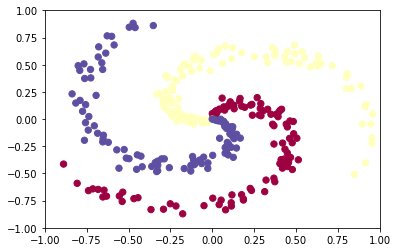

In [36]:
#==构造数据==
np.random.seed(0)
N = 100#每个分类多少点
D = 2#输入 维度
K = 3#输出 分类数
X = np.zeros((N*K,D))
y = np.zeros(N*K,dtype='uint8')

#print("X:",X)
#print("y:",y)

for j in range(K):
    ix = range(N*j,N*(j+1))
    #print(ix)
    r = np.linspace(0.0,1,N)#半径
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    #print(r)
    #print(t)
    X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix] = j
    #print(y[ix])
    
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap = plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [44]:
#==用神经网络nn给以上图形分类==
h = 100 #隐层大小，全连接神经元数
W = 0.01*np.random.randn(D,h)
b = np.zeros((1,h))
#第一层W连接输入D 输出h, D行 h列.randn生成正态分布随机矩阵
#b与W维度一致
print("W：",W.shape)
print("b：",b.shape)
W2 = 0.01*np.random.randn(h,K)
b2 = np.zeros((1,K))
#第二层W2连接前一层输出h,和输出K分类数
#b2与w2维度一致
print("W2:",W2.shape)
print("b2:",b2.shape)

W： (2, 100)
b： (1, 100)
W2: (100, 3)
b2: (1, 3)


In [56]:
#超参数
step_size = 1e-0 #10^-0
reg = 1e-3 #惩罚系数（力度）10^-3

#梯度下降迭代
num_examples = X.shape[0]
print(num_examples)
for i in range(2000):
    
    #==前向传播==
    
    #第一层 #隐层 relu( WX+b) [N*K]
    h_layer = np.maximum(0,np.dot(X,W)+b)
    #输入为X
    
    #第二层(只做两层，第二层不用激活函数Relu，直接分类了)
    scores = np.dot(h_layer,W2)+b2
    #输入为上一层的h_layer
    
    #softmax分类器 根据公式e^x/累加每个e^x得到分类概率值,
    exp_scores = np.exp(scores) # e^scores
    probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    #prob概率
    
    #计算loss函数是外加-log(e^x/累加每个e^x)
    correct_logprobs = -np.log(probs[range(num_examples),y])
    dataLoss = np.sum(correct_logprobs)/num_examples
    #loss累加求平均
#print(dataLoss)
    #W权重的loss 公式0.5W^2
    regLoss = 0.5*reg*np.sum(W*W)+0.5*reg*np.sum(W2*W2)
    loss = dataLoss+regLoss
    if i % 100 == 0:#第100条打印一次loss
        print("第%d次迭代，loss:%f" % (i,loss))
    
    #==反向传播（算梯度，求参数w,b）==
    #计算梯度
    dscores = probs #wx算梯度=w，即前面softmax反回来的概率值probs
    dscores[range(num_examples),y] -=1 #对b求导算梯度，就=1
    dscores /= num_examples
    
    #继续向前传递
    dW2 = np.dot(h_layer.T,dscores) #连接隐层和前面传过来的梯度
    #W2X+b中对w2求导,根据矩阵求导可知就是x.T(x为前面传过来的h_layer值),*前面传过来的导数（链式反向传导
    db2 = np.sum(dscores,axis = 0, keepdims=True)
    #对b2求导就=1，全连接层的b2总梯度即为1*前面传来过的梯度dscores
    #下一层，Relu激活函数算梯度
    #[Relu max(0,x) max 0到x的激活函数怎么求？>0则样度=1,<=0则梯度=0】
    dhidden = np.dot(dscores,W2.T)#第一层对x求导=前面传过来的梯度dscores *W2.T
    dhidden[h_layer<=0] = 0
    #继续传到第一层
    dW = np.dot(X.T,dhidden)
    db = np.sum(dhidden,axis=0,keepdims=True)
    
    #w正则求导偏导 0.5*w^2 求导即为w
    dW2 += reg*W2
    dW += reg*W
    
    #更新参数
    W += -step_size*dW
    b += -step_size*db
    W2 += -step_size*dW2
    b2 += -step_size*db2

#==用更新过的参数w b再重新训练模型（更新模型）==
h_layer2 = np.maximum(0,np.dot(X,W)+b)
scores2 = np.dot(h_layer2,W2)+b2
pred_class = np.argmax(scores2,axis=1)    
print("训练精度：%.2f" % (np.mean(pred_class ==y)))    


300
第0次迭代，loss:1.098862
第100次迭代，loss:0.719407
第200次迭代，loss:0.709846
第300次迭代，loss:0.555778
第400次迭代，loss:0.405296
第500次迭代，loss:0.389856
第600次迭代，loss:0.366870
第700次迭代，loss:0.344314
第800次迭代，loss:0.332988
第900次迭代，loss:0.377664
第1000次迭代，loss:0.336538
第1100次迭代，loss:0.286190
第1200次迭代，loss:0.279502
第1300次迭代，loss:0.277102
第1400次迭代，loss:0.274843
第1500次迭代，loss:0.272097
第1600次迭代，loss:0.269657
第1700次迭代，loss:0.267397
第1800次迭代，loss:0.265621
第1900次迭代，loss:0.264140
训练精度：0.97


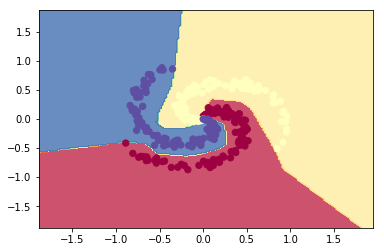

In [57]:
#==画图==
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [ ]:
#上图显示神经网络可分类上图
#以上神经网络结构总结
'''
输入层：输入x
隐层1：权重参数w和x的计算结果，(//存储的单元有叫神经元，其实神经元是不存在的)，线就是w，连接输入层和隐层1，后面一样
权重结果层层乘起来就是前面优化时说的求导传递
激活函数Relu将隐层1的线性转为非线性（max(0 x) >0的值为x，<=0的为0）
隐层2：
输出层
连softmax()(公式probs = e^x / 累加e^x 求概率值probs，loss函数 -log(probs)归一化，大大小小的数转化为0到1之间的log值，概率值，用于分类)


隐藏层为什么出现？
y = wx是线性方程
而神经网络特点：
层次性，非线性，如上例加了一个Relu max(0,)比较的这一步，这个max是激活函数
线性变非线性就是加上一个激活函数。
比如sigmoid softmax加上以后，就是把线性的x输入，变成了非线性的概率曲线。

【隐藏层出现的作用就是不止存储了输入层与权重的计算结果，还要对结果进行激活函数的操作，压缩成非线性表达，
多层，就是一层一层压缩为不同的激函数。】
】
【正因为这些激活函数，使得单纯的线性输入到输出中间加了千变万化的处理函数，
使神经网络达到千变万化的效果。】
'''

In [68]:
#==以下对比线性line回归wx+b直接连softmax分类上图==
#与nn神经网络区别是少了隐层的多神经元组成大量wx+b，
#少了Relu激活函数转线性为非线性一层

def lineClassify():
    W = 0.01*np.random.randn(D,K)
    b = np.zeros((1,K))
    step_size = 1e-0
    reg = 1e-3

    num_examples = X.shape[0]
    for i in range(1000):
        
        #==前向传播==
        
        scores = np.dot(X,W)+b
        
        #softmax公式 e^x/累加e^x求概率
        exp_scores = np.exp(scores)
        probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        #axis=1,keepdims=True 按行相加，保持二维特性
        #print(probs.shape)
        
        #计算loss -log(probs) 根据y值分类对应计算
        correct_logprobs = -np.log(probs[range(num_examples),y])
        #print(correct_logprobs.shape)
        #求平均loss
        dataLoss = np.sum(correct_logprobs)/num_examples
        #加w正则惩罚项loss
        regLoss = 0.5*reg*np.sum(W*W)
        loss = dataLoss + regLoss
        
        if i % 100 ==0:
            print("第 %d 次迭代，loss: %.2f" % (i,loss))
        
        #==反向传播==
        
        #算梯度
        dscores = probs
        dscores[range(num_examples),y] -=1
        dscores /= num_examples
        
        dW = np.dot(X.T, dscores)#WX+B中对w求导即为X.T,再乘softmax传过来的分类个导数
        db = np.sum(dscores,axis=0,keepdims=True)
        #按列加，保持2维
        dW += reg*W#加0.5W^2的偏导 W
        
        #更新参数
        W += -step_size * dW
        b += -step_size * db
        
    #求得分，线性与nn比较，这里就不用加max relu激活函数了    
    scores = np.dot(X,W)+b
    pred_class = np.argmax(scores,axis=1)#概率得分最高的为这个分类
    print("训练精度：%.2f" % (np.mean(pred_class==y)))#分类与y一致的正确
    
    #==画图==
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
        


第 0 次迭代，loss: 1.10
第 100 次迭代，loss: 0.79
第 200 次迭代，loss: 0.79
第 300 次迭代，loss: 0.79
第 400 次迭代，loss: 0.79
第 500 次迭代，loss: 0.79
第 600 次迭代，loss: 0.79
第 700 次迭代，loss: 0.79
第 800 次迭代，loss: 0.79
第 900 次迭代，loss: 0.79
训练精度：0.49


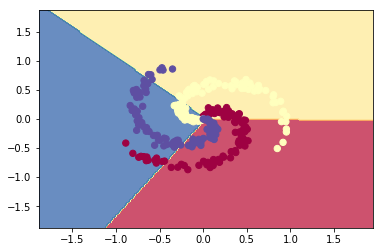

In [69]:
lineClassify()

In [ ]:
#由上面两分类结果图可知，上图神经网络可分，线性回归不可分
'''
#【总结：
#线性分类是切一刀分两类，再分再切，NN神经网络等于是切很多刀不规则的。
#由神经元构成分类的边界，nn由于神经元个数比较多，
#所以解决了线性不可分的问题。
#】  
'''